In [5]:
def neighbors(G):
    
        #this function gives me the set of all neighbors of vertices in the graph.
        
    V = G.vertices()
    E = G.edges(labels=None)

    N = []
    for i in V:
        s=[]
        for j in V:
            if (i,j) in E or (j,i) in E:
                s.append(j)
        N.append(s)
    return N
    
from itertools import permutations
def Perm(G):
    
  #this function computes all permutations of the neighbors of each vertex i in {0,1,...,n} and returns them in 2-dim array.

    Permutations = []
    for i in range(len(neighbors(G))):
        perm = permutations(neighbors(G)[i])
        Permutations.append(list(perm)) 
   
    return [[Permutations[i][j] for i in range (len(Permutations))] for j in range (0,2)]


def phi(S,x):
    #in permutation S = (0,1,...,n-1) we have phi(S,i) = i+1 (mod n).
    for i in range (0,len(S)-1):
        if S[i] == x:
            return S[i+1]
    for i in range (len(S)-1,len(S)):
        if S[i] == x:
            return S[0]

In [6]:
G = graphs.CompleteGraph(4)
A = Perm(G)[0]
B = Perm(G)[1]
def FW(e,j,x):
    if j == 0 and x == 0:
        e0 = e
        FW = [e[0],e[1]]
        for i in range (2*len(E)):    
            FW.append(phi(A[e[1]],e[0]))
            e = (e[1],phi(A[e[1]],e[0]))
            if e == e0:
                break
        return FW
    else:
        T = A[j]
        A[j] = B[j]
        B[j] = T
        e0 = e
        FW = [e[0],e[1]]
        for i in range (2*len(E)):    
            FW.append(phi(A[e[1]],e[0]))
            e = (e[1],phi(A[e[1]],e[0]))
            if e == e0:
                break
        return FW

In [7]:
G = graphs.CompleteGraph(4)

V = G.vertices()

E = G.edges(labels=None)

FW((1,0),0,0)

[1, 0, 2, 1, 3, 2, 0, 3, 1, 0]

In [8]:
FW((1,0), 2,1)

[1, 0, 2, 3, 0, 1, 2, 0, 3, 1, 0]

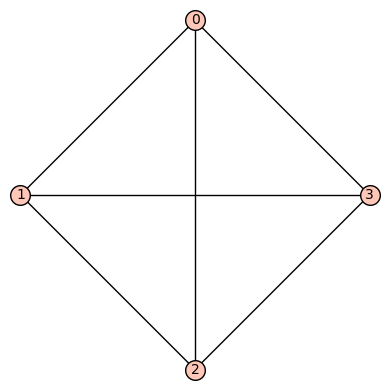

In [9]:
G.show()

In [10]:
FW((1,0), 0, 1)

[1, 0, 3, 1, 0]

In [11]:
FW((0,1),0,0)

[0, 1, 2, 0, 1]

In [12]:
FW((0,2),0,0)

[0, 2, 3, 0, 2]

In [13]:
FW((0,3),0,0)

[0, 3, 1, 0, 3]

In [14]:
FW((1,3),0,0)

[1, 3, 2, 1, 3]

In [15]:
print(A)

[(1, 3, 2), (0, 2, 3), (0, 3, 1), (0, 1, 2)]


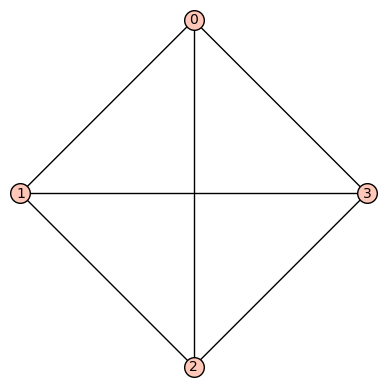

In [16]:
G.show()